# Questão 1

In [27]:
import sympy as sp
import numpy as np
from sympy import *
from utils import symdisp, symplot, round_expr


In [28]:
m = [8,1,4] # <<<<<<< os 3 ultimos digitos da Matricula

#dados iniciais fornecidos na questão
r1 = m[0]+1;symdisp('R_1 = ',r1,'Ω')
r2 = m[1]+1;symdisp('R_2 = ',r2,'Ω')
r3 = m[2]+1;symdisp('R_3 = ',r3,'Ω')
L1 = 20*10**-3;symdisp('L_1 = ',L1*10**3,'mH')
L2 = 25*10**-3;symdisp('L_2 = ',L2*10**3,'mH')
M  = 5*(10**-3);symdisp('M = ',M*10**3,'mH') #indutania mútua


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# a)

In [29]:
# Para t<0 os indutores funcionam como curto circuito, logo do circuito equivalente resultou a i_L(0)=1/R1:
print('Corrente inicial nos indutores')
Io = 1/r1; symdisp('I_o=',round(Io*10**3,3),'mA')


Corrente inicial nos indutores


<IPython.core.display.Math object>

# b)

In [30]:

print('Indutância equivalente:')
Leq = L1+L2-2*M
symdisp('=> L_{eq} = (L_1 + L_2 )L_{eq} =',Leq*10**3,'mH')
print('Energia Inicial Armazenada:')
w = (1/2)*Leq*(Io**2)
symdisp('w_L(0) =\\frac{1}{2} L_{eq}I_o^2=> w_L(0)=',round(w*10**6,3),'μJ')


Indutância equivalente:


<IPython.core.display.Math object>

Energia Inicial Armazenada:


<IPython.core.display.Math object>

# c)

In [31]:
ialpha, ibeta, igamma = sp.symbols('i_α,i_β,i_γ')# variaveis desconhecidas

# Sistema de 3 Equações
eq1 = sp.Eq(r1*ialpha-r1*ibeta, 1)             
eq2 = sp.Eq(-r1*ialpha+(r1-r3)*ibeta-r3*igamma,0)  
eq3 = sp.Eq((-2-r3)*ibeta+(-2+r2-r3)*igamma,0) 

print('Sistema de equações lineares:')
display(eq1, eq2, eq3) 
soluc = sp.solve((eq1, eq2, eq3), dict=True)
soluc = soluc[0]

ialpha = soluc[ialpha];ibeta  = soluc[ibeta];igamma = soluc[igamma]
print('Solução do sistema:')
symdisp('i_α =', round(ialpha*10**3,3),'mA')
symdisp('i_β =', round(ibeta*10**3,3),'mA')
symdisp('i_γ =', round(igamma*10**3,3),'mA')


Sistema de equações lineares:


Eq(9*i_α - 9*i_β, 1)

Eq(-9*i_α + 4*i_β - 5*i_γ, 0)

Eq(-7*i_β - 5*i_γ, 0)

Solução do sistema:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Constante do Tempo

In [32]:
Rth = ialpha**-1; symdisp('R_{Th} = ',round(Rth,3),'Ω')
τ = Leq/Rth ; symdisp('τ = ',round(τ*10**3,2),'ms');symdisp('τ^{-1} = ',round(τ**-1,2),'s^-1')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Para determinar Vth temos o seguinte sistema:

In [33]:
ialpha, ibeta = sp.symbols('i_α,i_β')# variaveis desconhecidas

# Sistema de 2 Equações
eq1 = sp.Eq((r1-r3)*ialpha-r3*ibeta, 2)             
eq2 = sp.Eq((-r3-2)*ialpha+(-r3-2+r2)*ibeta,-r2*0.25)   

print('Sistema de equações lineares:')
display(eq1, eq2) 
soluc = sp.solve((eq1, eq2), dict=True)
soluc = soluc[0]

ialpha = soluc[ialpha];ibeta  = soluc[ibeta]
print('Solução do sistema:')
symdisp('i_α =', round(ialpha*10**3,3),'mA')
symdisp('i_β =', round(ibeta*10**3,3),'mA')


Sistema de equações lineares:


Eq(4*i_α - 5*i_β, 2)

Eq(-7*i_α - 5*i_β, -0.5)

Solução do sistema:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Onde Vth = Vr1 + fonte de 1v, e Vr1 = R1*i_alpha

In [34]:
vr1 = r1*ialpha; symdisp('v_{R1} = ',round(vr1,3),'V')
vth = vr1+1;symdisp('=> V_{Th} = ',round(vth,3),'V')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Com todos os parâmetros em "mãos", agora podemos determinar iL(t), t>=0:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

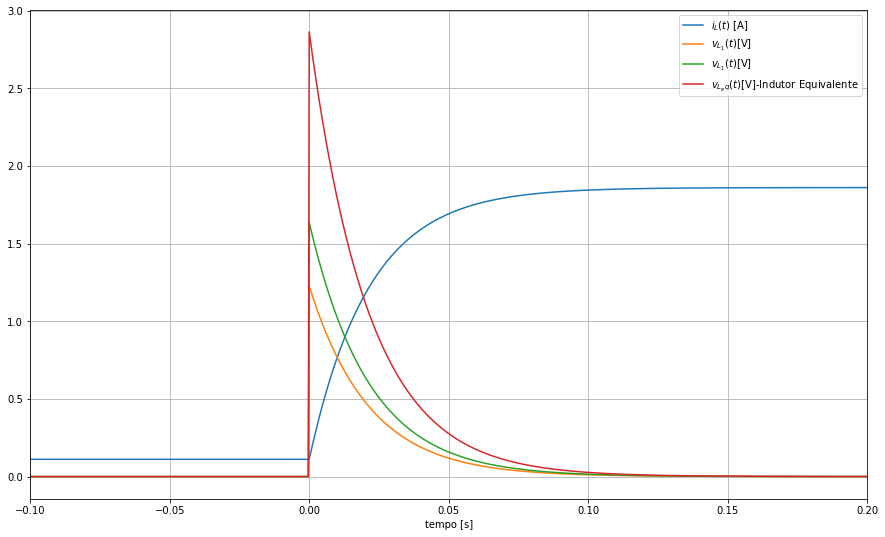

In [35]:
t = sp.symbols('t', real=True)
t0 = 0
iLt = (vth/Rth) + (Io-(vth/Rth))*sp.exp(-t/τ)
vL1t = (L1 - M)*sp.diff(iLt,t)
vL2t = (L2 - M)*sp.diff(iLt,t)
vLt = Leq*sp.diff(iLt,t)

iLt_plot = sp.Piecewise((round(Io,3),t<0),(round_expr(iLt,3), t>= 0))
symdisp('i_L(t) =', iLt_plot, 'A')

vL1t_plot = sp.Piecewise((round(Leq*sp.diff(Io,t),3),t<0),(round_expr(vL1t,3), t>= 0))
symdisp('v_{L1}(t) =', vL1t_plot, 'V')

vL2t_plot = sp.Piecewise((round(Leq*sp.diff(Io,t),3),t<0),(round_expr(vL2t,3), t>= 0))
symdisp('v_{L2}(t) =', vL2t_plot, 'V')

vLt_plot = sp.Piecewise((round(Leq*sp.diff(Io,t),3),t<0),(round_expr(vLt,3), t>= 0))
symdisp('v_L(t) =', vLt_plot, 'V')

intervalo  = np.linspace(t0-0.1,t0+0.20, 1000)
symplot(t, [iLt_plot,vL1t_plot,vL2t_plot,vLt_plot], intervalo, funLabel = ['$i_L(t)$ [A]','$v_{L_1}(t)$[V]','$v_{L_1}(t)$[V]','$v_{L_eq}(t)$[V]-Indutor Equivalente']) 


# d)

In [36]:
ialpha_aux = 0.25
ibeta_aux, igamma_aux = sp.symbols('i_β, i_γ')# variaveis desconhecidas

# Sistema de 2 Equações
eq1 = sp.Eq((r1-r3)*ibeta_aux-r3*igamma_aux, 2+(r1*iLt))             
eq2 = sp.Eq((-r3-2)*ibeta_aux+(-r3-2+r2)*igamma_aux,-r2*ialpha_aux)   

print('Sistema de equações lineares:')
display(round_expr(eq1,2), eq2) 


Sistema de equações lineares:


Eq(4*i_β - 5*i_γ, 18.75 - 15.75*exp(-46.75*t))

Eq(-7*i_β - 5*i_γ, -0.5)

Eq(-2.9, 18.75 - 15.75*exp(-46.75*t))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

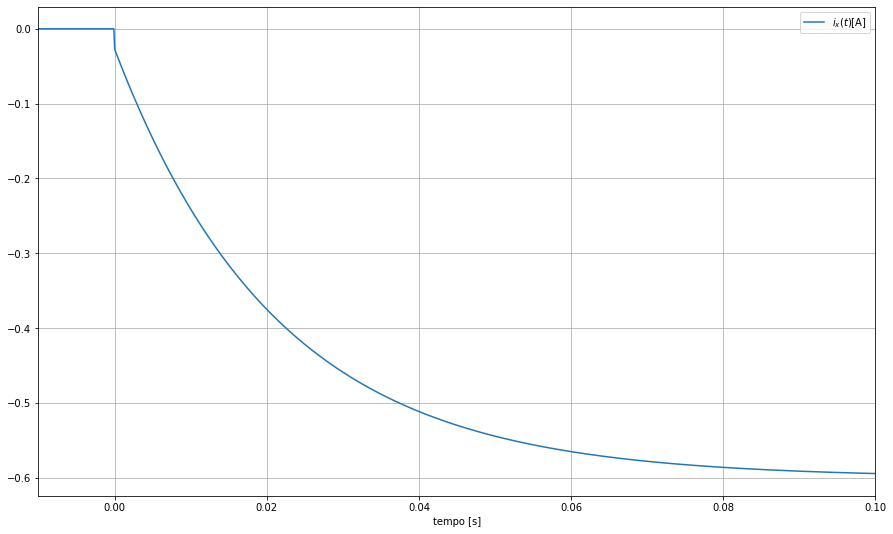

In [37]:
igamma = (0.5-(7*ibeta))/5
eq1 = sp.Eq((r1-r3)*ibeta-r3*igamma, 2+(r1*iLt))
display(round_expr(eq1,2))
ibeta1 = (19.25 -15.75*sp.exp(-46.75*t))/11;symdisp('i_β(t) =', round_expr(ibeta1,3), 'A')
igamma1 = (0.5-(7*ibeta1))/5; symdisp('i_γ(t) =', round_expr(igamma1,3), 'A')
ix = ibeta1+igamma1

ix_plot = sp.Piecewise((0,t<0),(round_expr(ix,3), t>= 0))
symdisp('i_x(t)=i_β(t)+i_γ(t)=> i_x(t) =', ix_plot, 'A')

intervalo  = np.linspace(t0-0.01,t0+0.1, 1000)
symplot(t, [ix_plot], intervalo, funLabel = ['$i_x(t)$[A]']) 


# e)

Enegia acumulada nos indutores em t ->oo :

In [38]:
print('Energia acumulada no INDUTOR 1:');wL1 = 0.5*(L1-M)*(iLt**2); symdisp('w_{L_1}(t) = ',round_expr(wL1,3),'J')
woo1 = sp.limit(wL1,t,oo); symdisp('lim_{t->oo} w_{L_1}(t) = ',round(woo1*1000,3),'mJ')

print('Energia acumulada no INDUTOR 2:');wL2 = 0.5*(L2-M)*(iLt**2); symdisp('w_{L_2}(t) = ',round_expr(wL2,3),'J')
woo2 = sp.limit(wL2,t,oo); symdisp('lim_{t->oo} w_{L_2}(t) = ',round(woo2*1000,3),'mJ')

print('Energia acumulada no INDUTOR EQUIVALENTE:');wL = 0.5*(Leq)*(iLt**2); symdisp('w_{L_eq}(t) = ',round_expr(wL,3),'J')
woo = sp.limit(wL,t,oo); symdisp('lim_{t->oo} w_{Leq}(t) = ',round(woo*1000,3),'mJ')

Energia acumulada no INDUTOR 1:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Energia acumulada no INDUTOR 2:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Energia acumulada no INDUTOR EQUIVALENTE:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# f)

Correntes nos Ramos internos:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

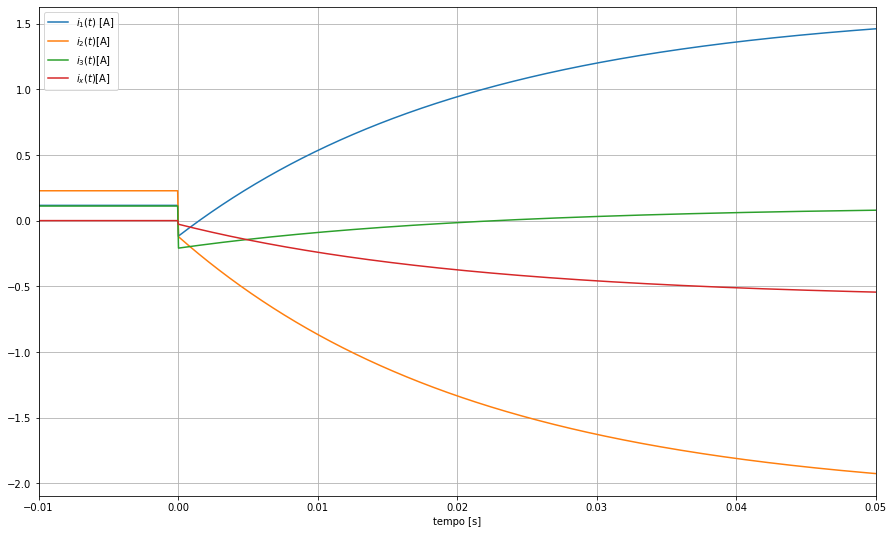

In [39]:
i1 = iLt-ialpha
i2 = ialpha+igamma1
i3 = iLt-ibeta1
print('Correntes nos Ramos internos:')
i1_plot = sp.Piecewise((round(-Io+ialpha,3),t<0),(round_expr(i1,2), t>= 0))
symdisp('i_1(t)=', i1_plot, 'A')

i2_plot = sp.Piecewise((ialpha,t<0),(round_expr(i2,2), t>= 0))
symdisp('i_2(t)=', i2_plot, 'A')

i3_plot = sp.Piecewise((round(Io,3),t<0),(round_expr(i3,2), t>= 0))
symdisp('i_3(t)=', i3_plot, 'A')

ix_plot = sp.Piecewise((0,t<0),(round_expr(ix,3), t>= 0))
symdisp('i_x(t) =', ix_plot, 'A')

intervalo  = np.linspace(t0-0.01,t0+0.05, 1000)
symplot(t, [i1_plot,i2_plot,i3_plot,ix_plot], intervalo, funLabel = ['$i_1(t)$ [A]','$i_2(t)$[A]','$i_3(t)$[A]','$i_x(t)$[A]']) 

Corrente nos ramos externos:


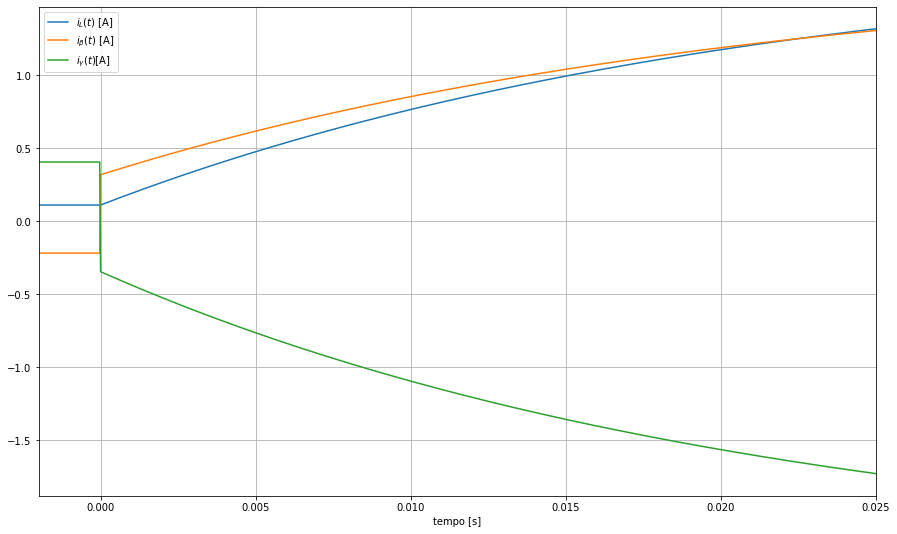

In [40]:
print('Corrente nos ramos externos:')
ibeta1_plot = sp.Piecewise((ibeta,t<0),(ibeta1, t>= 0))
igamma1_plot = sp.Piecewise((igamma,t<0),(igamma1,t>=0))

intervalo  = np.linspace(t0-0.002,t0+0.025, 1000)
symplot(t, [iLt_plot,ibeta1_plot,igamma1_plot], intervalo, funLabel = ['$i_L(t)$ [A]','$i_β(t)$ [A]','$i_γ(t)$[A]','$i_x(t)$[A]']) 


Os elementos que sofreram variação abruta de corrente são: Resistor $R_2$, Resistor $R_1$, Fonte de Tensão de $1V$, Fonte de Tensão de $2V$ e Fonte de tensão dependente $2_{i_x}$.

Tensão em cada Elemento Passivo Interno:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

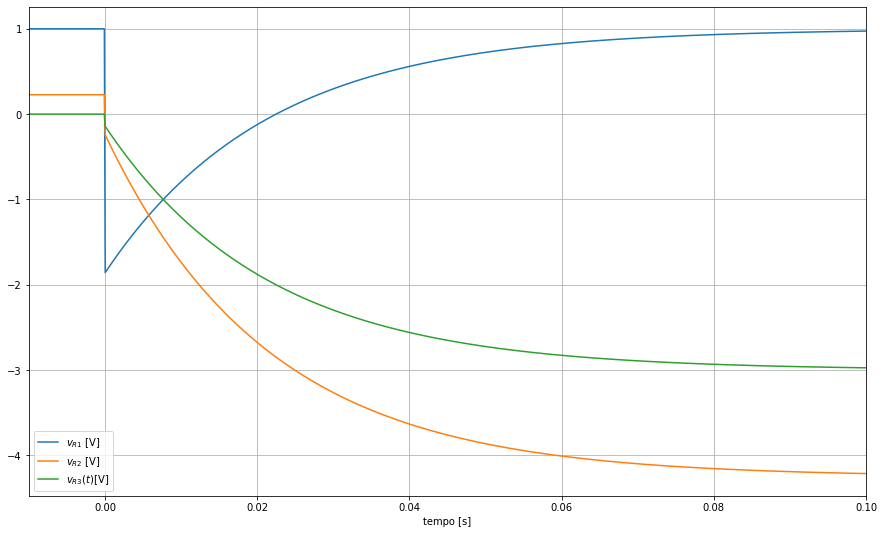

In [41]:
print('Tensão em cada Elemento Passivo Interno:')
vr1 = r1*i3 #R1 interno
vr2 = r2*i2 
vr3 = r3*ix

vr1_plot = sp.Piecewise((Io*r1,t<0),(round_expr(vr1,2), t>= 0))
symdisp('v_{R1}(t)=', vr1_plot, 'V')

vr2_plot = sp.Piecewise((round(ialpha,3),t<0),(round_expr(vr2,2), t>= 0))
symdisp('v_{R2}(t)=', vr2_plot, 'V')

vr3_plot = sp.Piecewise((0,t<0),(round_expr(vr3,2), t>= 0))
symdisp('v_{R3}(t)=', vr1_plot, 'V')

intervalo  = np.linspace(t0-0.01,t0+0.1, 1000)
symplot(t, [vr1_plot,vr2_plot,vr3_plot], intervalo, funLabel = ['$v_{R1}}(t)$ [V]','$v_{R2}$ [V]','$v_{R3}(t)$[V]'])




Tensão em cada Elemento Passivo e ativo externo:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

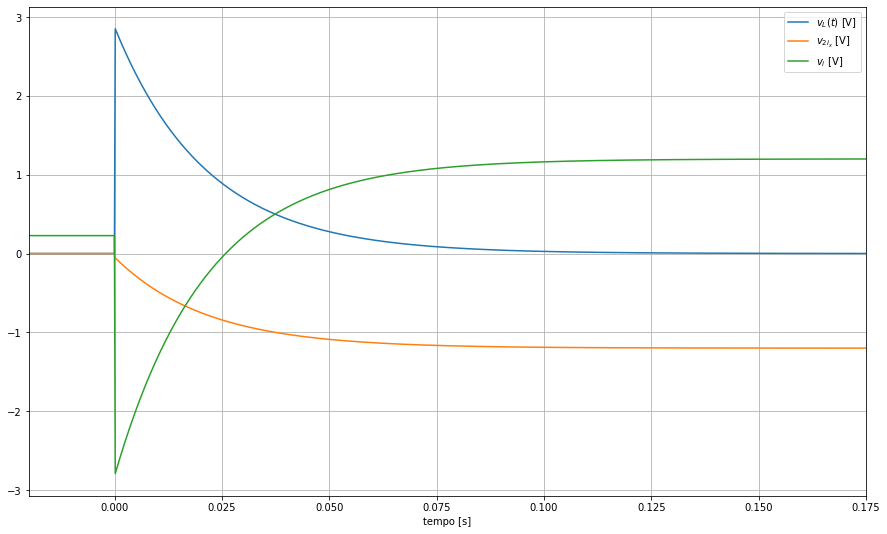

In [42]:
print('Tensão em cada Elemento Passivo e ativo externo:')
v2ix = 2*ix #Fonte de tensão dependente
vi   = -r1*ialpha - i2*r2 -1


v2ix_plot = sp.Piecewise((0,t<0),(round_expr(v2ix,2), t>= 0))
symdisp('v_{2i_x}(t)=', round_expr(v2ix_plot,3), 'V')

vi_plot = sp.Piecewise((ialpha,t<0),(round_expr(vi,2), t>= 0))
symdisp('v_{i}(t)=', round_expr(vi_plot,3), 'V')

vLt_plot = sp.Piecewise((round(Leq*sp.diff(Io,t),3),t<0),(round_expr(vLt,3), t>= 0))
symdisp('v_L(t) =', vLt_plot, 'V')


intervalo  = np.linspace(t0-0.02,t0+0.175, 1000)
symplot(t, [vLt_plot,v2ix_plot,vi_plot], intervalo, funLabel = ['$v_L(t)$ [V]','$v_{2i_x}}(t)$ [V]','$v_{i}$ [V]'])

Os Elementos que sofreram variação abrupta de Tensão: Resistor interno $R_1$, Resistor $R_2$, $Indutores L_1 e L_2$, Fonte de Corrente e sua resistencia $R_1$ que está em série